In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Importar datos:

In [49]:
df = pd.read_csv("incident_event_log.csv")


Análisis exploratorio problema 1 y 3:

In [59]:
#Cambiar categoricas por variables dummies:
df2= df
df2 = pd.get_dummies(df2, columns=["impact", "urgency", "priority","notify"], drop_first=False)

df2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,impact_3 - Low,urgency_1 - High,urgency_2 - Medium,urgency_3 - Low,priority_1 - Critical,priority_2 - High,priority_3 - Moderate,priority_4 - Low,notify_Do Not Notify,notify_Send Email
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,True,False,False,False,True,False,True,False
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,True,False,False,False,True,False,True,False
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,True,False,False,False,True,False,True,False
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,True,False,False,False,True,False,True,False
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,False,True,False,False,False,True,False,True,False


In [60]:
#Sacar un data frame que contenga unicamente las variables de nuestra interés:
df2= df2.drop(["number","incident_state","caller_id","opened_by","opened_at","sys_created_by","sys_created_at","sys_updated_by","sys_updated_at",
              "contact_type","location","category","subcategory","u_symptom","cmdb_ci","assignment_group","assigned_to","problem_id",
              "rfc","vendor","caused_by","closed_code","resolved_by","resolved_at","closed_at"], axis=1)

#Correlación con made_sla
df2.corrwith(df2["made_sla"])

active                     0.565501
reassignment_count        -0.089037
reopen_count              -0.015880
sys_mod_count             -0.241942
made_sla                   1.000000
knowledge                 -0.073070
u_priority_confirmation   -0.232037
impact_1 - High           -0.034893
impact_2 - Medium          0.005965
impact_3 - Low             0.025006
urgency_1 - High          -0.044749
urgency_2 - Medium         0.017464
urgency_3 - Low            0.022189
priority_1 - Critical     -0.027008
priority_2 - High         -0.042490
priority_3 - Moderate      0.022449
priority_4 - Low           0.023597
notify_Do Not Notify       0.024959
notify_Send Email         -0.024959
dtype: float64

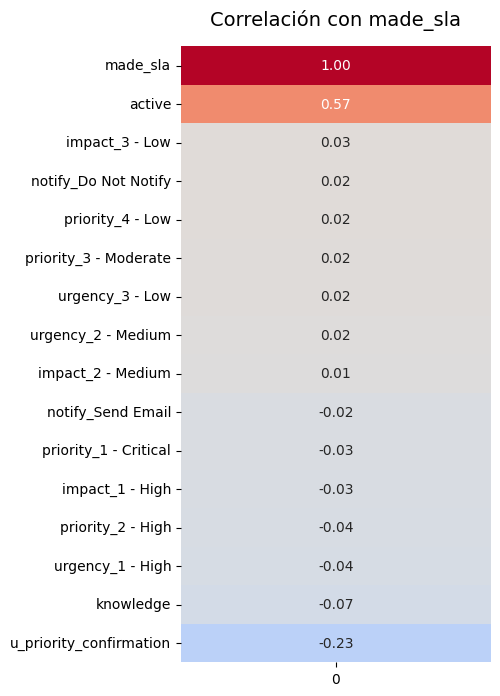

In [67]:
#Grafica para comparar con las variables categoricas:
df3 = df2.drop(["reassignment_count","reopen_count","sys_mod_count"],axis=1)

# Graficar mapa de calor:

corr = ((df3.corrwith(df3["made_sla"]))).sort_values(ascending=False)

plt.figure(figsize=(4,8))
sns.heatmap(
    corr.to_frame(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=False
)
plt.title("Correlación con made_sla", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()


Text(0.5, 1.0, 'Relación made_sla y reassignment_count')

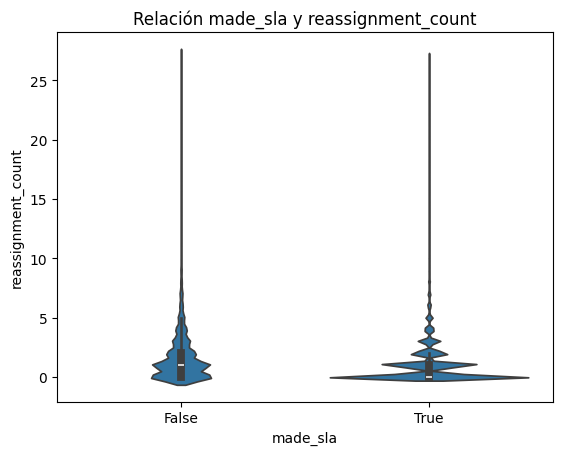

In [69]:
#Gráfica categoricas vs. continuas

sns.violinplot(data=df, x=df["made_sla"], y=df["reassignment_count"])
plt.title("Relación made_sla y reassignment_count")


Text(0.5, 1.0, 'Relación made_sla y reopen_count')

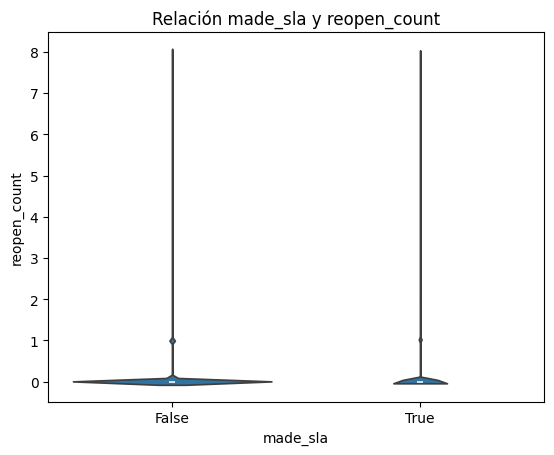

In [70]:
sns.violinplot(data=df, x=df["made_sla"], y=df["reopen_count"])
plt.title("Relación made_sla y reopen_count")

Text(0.5, 1.0, 'Relación made_sla y sys_mod_count')

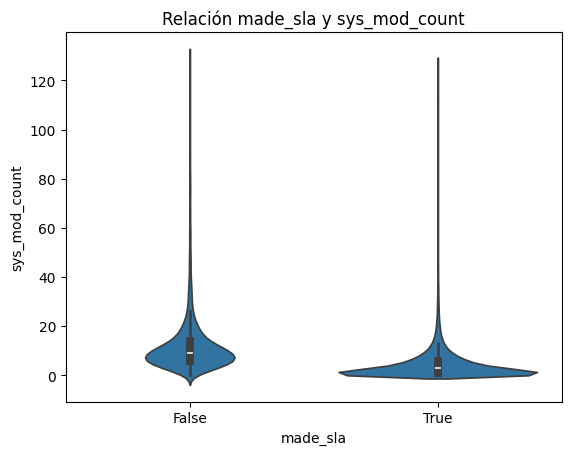

In [71]:
sns.violinplot(data=df, x=df["made_sla"], y=df["sys_mod_count"])
plt.title("Relación made_sla y sys_mod_count")